### Investigate the Premier League dataset

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
library(skimr) #provides broad overview of data frame (Tidy data lecture)
library(visdat) #provide visualisation of entire dataframe (google definition)

In [4]:
premier_df <- read_csv("PremierLeagueTables.csv") %>%
 glimpse()

New names:
• `` -> `...1`
Rows: 260 Columns: 26
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Season_ID, Season, League, Team_ID, Squad, Player_ID, Top.Team.Sco...
dbl (17): ...1, Rk, MP, W, D, L, GF, GA, GD, Pts, Pts.MP, Attendance, GoalsS...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 260
Columns: 26
$ ...1            <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Season_ID       <chr> "09/10-PL", "09/10-PL", "09/10-PL", "09/10-PL", "09/10…
$ Season          <chr> "2009-2010", "2009-2010", "2009-2010", "2009-2010", "2…
$ League          <chr> "Premier League", "Premier League", "Premier League", …
$ Rk              <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ Team_ID         <chr> "09/10-Chelsea", "09/10-Manchester Utd", "09/10-Arsena…
$ Squad           <chr> "Chelsea", "Manchester Utd", "Arsenal", "Tottenham", "…
$ MP              <dbl> 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38…
$ W               <dbl> 27, 27, 23, 21, 18, 17, 18, 16, 13, 13, 11, 12, 11, 10…
$ D               <dbl> 5, 4, 6, 7, 13, 13, 9, 13, 11, 11, 14, 10, 11, 9, 11, …
$ L               <dbl> 6, 7, 9, 10, 7, 8, 11, 9, 14, 14, 13, 16, 16, 19, 18, …
$ GF              <dbl> 103, 86, 83, 67, 73, 52, 61, 60, 38, 41, 34, 39, 48, 4…
$ GA              

### There are unwanted columns that we are not interested in as they describe individual player performance.Also it has significant NA values. Lets get rid of them.

Remove xG, xGA, XGD, XGD.90

In [5]:
premier_df <- premier_df %>%
  select(!xG)

In [6]:
premier_df <- premier_df %>%
  select(!xGA)

In [7]:
premier_df <- premier_df %>%
  select(!xGD)

In [8]:
premier_df <- premier_df %>%
  select(!xGD.90)

In [9]:
premier_df %>% head()

...1,Season_ID,Season,League,Rk,Team_ID,Squad,MP,W,D,⋯,GA,GD,Pts,Pts.MP,Attendance,Player_ID,Top.Team.Scorer,GoalsScored,Goalkeeper,Notes
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,09/10-PL,2009-2010,Premier League,1,09/10-Chelsea,Chelsea,38,27,5,⋯,32,71,86,2.26,41423,09/10-Didier Drogba,Didier Drogba,29,Petr Čech,→ Champions League via league finish
2,09/10-PL,2009-2010,Premier League,2,09/10-Manchester Utd,Manchester Utd,38,27,4,⋯,28,58,85,2.24,74864,09/10-Wayne Rooney,Wayne Rooney,26,Edwin van der Sar,→ Champions League via league finish
3,09/10-PL,2009-2010,Premier League,3,09/10-Arsenal,Arsenal,38,23,6,⋯,41,42,75,1.97,59927,09/10-Cesc Fàbregas,Cesc Fàbregas,15,Manuel Almunia,→ Champions League via league finish
4,09/10-PL,2009-2010,Premier League,4,09/10-Tottenham,Tottenham,38,21,7,⋯,41,26,70,1.84,35794,09/10-Jermain Defoe,Jermain Defoe,18,Heurelho Gomes,→ Champions League via league finish
5,09/10-PL,2009-2010,Premier League,5,09/10-Manchester City,Manchester City,38,18,13,⋯,45,28,67,1.76,45470,09/10-Carlos Tevez,Carlos Tevez,23,Shay Given,→ Europa League via league finish
6,09/10-PL,2009-2010,Premier League,6,09/10-Aston Villa,Aston Villa,38,17,13,⋯,39,13,64,1.68,38573,09/10-Gabriel Agbonlahor,Gabriel Agbonlahor,13,Brad Friedel,→ Europa League via league finish 1


### Further preprocessing

Only the 2015 to 2022 seasons will be analysed. This is because the wage dataset only covers these seasons.

In [10]:
premier_filtered <- premier_df %>%
  filter(!between(substring(Season, 1, 4), "2009", "2014"))

In [11]:
premier_filtered %>% head()

...1,Season_ID,Season,League,Rk,Team_ID,Squad,MP,W,D,⋯,GA,GD,Pts,Pts.MP,Attendance,Player_ID,Top.Team.Scorer,GoalsScored,Goalkeeper,Notes
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
121,15/16-PL,2015-2016,Premier League,1,15/16-Leicester City,Leicester City,38,23,12,⋯,36,32,81,2.13,31998,15/16-Jamie Vardy,Jamie Vardy,24,Kasper Schmeichel,→ Champions League via league finish
122,15/16-PL,2015-2016,Premier League,2,15/16-Arsenal,Arsenal,38,20,11,⋯,36,29,71,1.87,59944,15/16-Olivier Giroud,Olivier Giroud,16,Petr Čech,→ Champions League via league finish
123,15/16-PL,2015-2016,Premier League,3,15/16-Tottenham,Tottenham,38,19,13,⋯,35,34,70,1.84,35776,15/16-Harry Kane,Harry Kane,25,Hugo Lloris,→ Champions League via league finish
124,15/16-PL,2015-2016,Premier League,4,15/16-Manchester City,Manchester City,38,19,9,⋯,41,30,66,1.74,54041,15/16-Sergio Agüero,Sergio Agüero,24,Joe Hart,→ Champions League via league finish
125,15/16-PL,2015-2016,Premier League,5,15/16-Manchester Utd,Manchester Utd,38,19,9,⋯,35,14,66,1.74,75286,15/16-Anthony Martial,Anthony Martial,11,David de Gea,→ Europa League via cup win 1
126,15/16-PL,2015-2016,Premier League,6,15/16-Southampton,Southampton,38,18,9,⋯,41,18,63,1.66,30751,"15/16-Sadio Mané, Graziano Pellè","Sadio Mané, Graziano Pellè",11,Fraser Forster,→ Europa League via league finish 2


### Investigate the Premier League Wages dataset

In [12]:
premier_wages <- read_csv("PremierLeagueWages.csv") %>%
 glimpse()

New names:
• `` -> `...1`
Rows: 180 Columns: 11
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (6): Season_ID, Season, League, Team_ID, Squad, X..Estimated
dbl (5): ...1, Rk, X..Pl, Weekly_Wages_pounds, Annual_Wages_pounds

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 180
Columns: 11
$ ...1                <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ Season_ID           <chr> "13/14-PL", "13/14-PL", "13/14-PL", "13/14-PL", "1…
$ Season              <chr> "2013-2014", "2013-2014", "2013-2014", "2013-2014"…
$ League              <chr> "Premier League", "Premier League", "Premier Leagu…
$ Rk                  <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ Team_ID             <chr> "13/14-Manchester City", "13/14-Chelsea", "13/14-M…
$ Squad               <chr> "Manchester City", "Chelsea", "Manchester Utd", "A…
$ X..Pl               <dbl> 28, 49, 37, 41, 35, 35, 42, 45, 39, 37, 33, 33, 48…
$ Weekly_Wages_pounds <dbl> 2177962, 1979269, 1871000, 1384500, 1262442, 10161…
$ Annual_Wages_pounds <dbl> 113254000, 102922000, 97292000, 71994000, 65647000…
$ X..Estimated        <chr> "100%", "100%", "100%", "100%", "100%", "100%", "1…


In [13]:
premier_wages %>% head()

...1,Season_ID,Season,League,Rk,Team_ID,Squad,X..Pl,Weekly_Wages_pounds,Annual_Wages_pounds,X..Estimated
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,13/14-PL,2013-2014,Premier League,1,13/14-Manchester City,Manchester City,28,2177962,113254000,100%
2,13/14-PL,2013-2014,Premier League,2,13/14-Chelsea,Chelsea,49,1979269,102922000,100%
3,13/14-PL,2013-2014,Premier League,3,13/14-Manchester Utd,Manchester Utd,37,1871000,97292000,100%
4,13/14-PL,2013-2014,Premier League,4,13/14-Arsenal,Arsenal,41,1384500,71994000,100%
5,13/14-PL,2013-2014,Premier League,5,13/14-Liverpool,Liverpool,35,1262442,65647000,100%
6,13/14-PL,2013-2014,Premier League,6,13/14-Everton,Everton,35,1016154,52840000,100%


In [14]:
premier_wages_filtered <- premier_wages %>%
  filter(!between(substring(Season, 1, 4), "2009", "2014"))

In [15]:
premier_wages_filtered %>% tail()

...1,Season_ID,Season,League,Rk,Team_ID,Squad,X..Pl,Weekly_Wages_pounds,Annual_Wages_pounds,X..Estimated
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
175,21/22-PL,2021-2022,Premier League,15,21/22-Brighton,Brighton,76,893654,46470000,24%
176,21/22-PL,2021-2022,Premier League,16,21/22-Watford,Watford,88,795769,41380000,36%
177,21/22-PL,2021-2022,Premier League,17,21/22-Burnley,Burnley,72,760000,39520000,22%
178,21/22-PL,2021-2022,Premier League,18,21/22-Norwich City,Norwich City,82,602308,31320000,28%
179,21/22-PL,2021-2022,Premier League,19,21/22-Leeds United,Leeds United,70,457885,23810000,27%
180,21/22-PL,2021-2022,Premier League,20,21/22-Brentford,Brentford,90,406346,21130000,36%


### Combine the premier_wages_filtered with premier_wages.

In [16]:
wins_and_wages <- merge(premier_filtered, premier_wages_filtered, by = c('Squad', 'Season'))

In [17]:
plot_1 <- ggplot(wins_and_wages, aes(x = Annual_Wages_pounds, y = W)) +
  geom_point(size = 5) +
  geom_smooth(
      method = 'lm', formula = y ~ x)+
  theme_classic() +
  xlab("Annual Wages") +
  ylab("Number of Wins") +
  ggtitle("Correlation Between Annual Wages & Wins in the Premier League (2015 - 2022)")

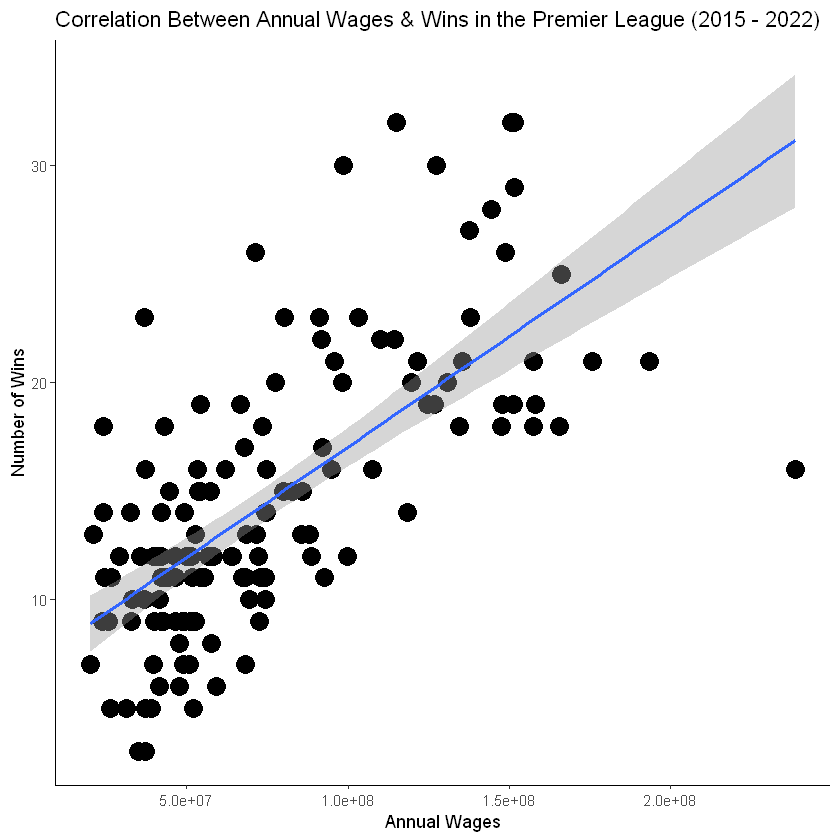

In [18]:
print(plot_1)

In [19]:
ggsave("wins_vs_wages_premier.png", plot = plot_1)

Saving 6.67 x 6.67 in image


In [20]:
cor(wins_and_wages$Annual_Wages_pounds, wins_and_wages$W)

[1] 0.686375

### Is there a correlation between attendance and number of wins?

In [23]:
plot_2 <- ggplot(wins_and_wages, aes(x = Attendance, y = W)) +
  geom_point(size = 5) +
  geom_smooth(
      method = 'lm', formula = y ~ x)+
  theme_classic() +
  xlab("Attendance") +
  ylab("Number of Wins") +
  ggtitle("Audience Attendance vs Wins in the Premier League (2015 - 2022)")

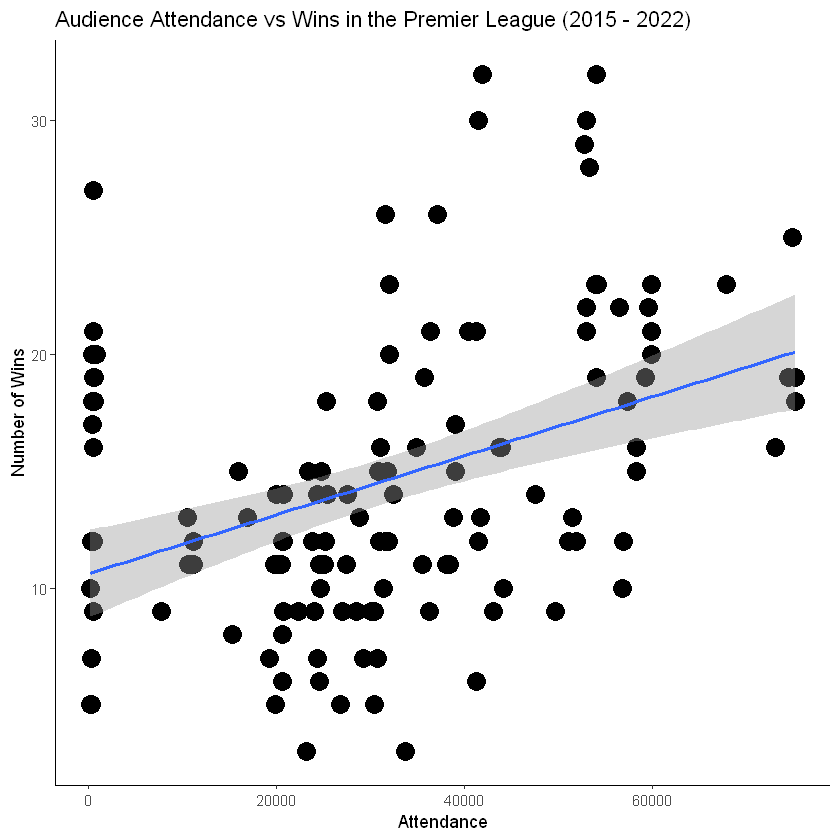

In [24]:
print(plot_2)

In [25]:
ggsave("attendance_wins_premier.png", plot = plot_2)

Saving 6.67 x 6.67 in image


The graph indicates that there is positive correlation between attendance and wins. However, it is not very insightful. This would have been better if there is data for home and away game stats for each team.

### Is there a correlation between annual wage and attendance?


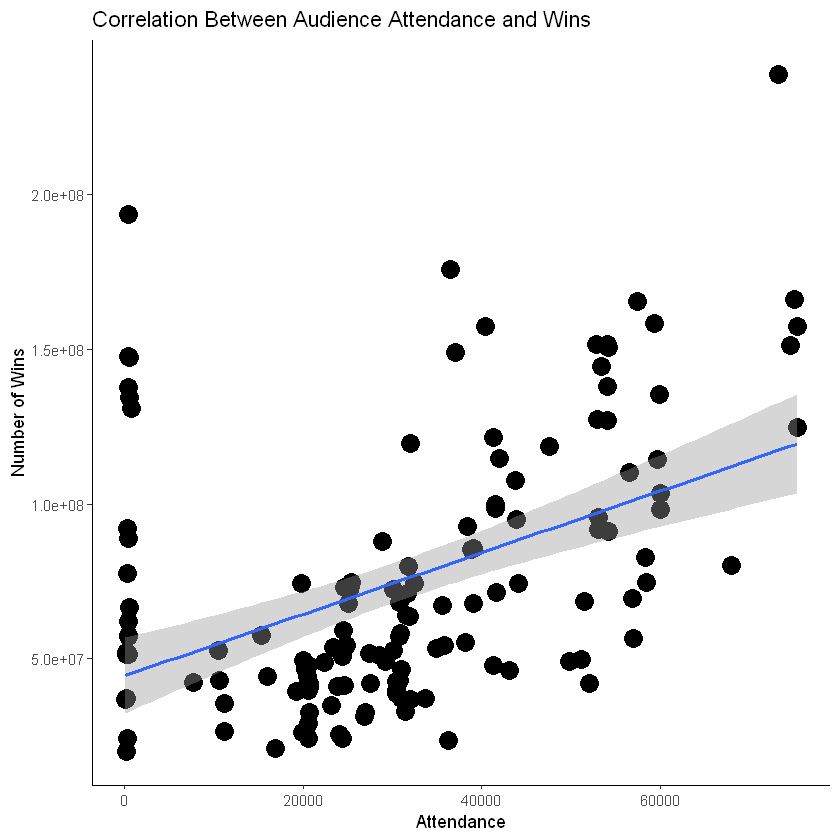

In [25]:
ggplot(wins_and_wages, aes(x = Attendance, y = Annual_Wages_pounds)) +
  geom_point(size = 5) +
  geom_smooth(
      method = 'lm', formula = y ~ x)+
  theme_classic() +
  xlab("Attendance") +
  ylab("Number of Wins") +
  ggtitle("Correlation Between Audience Attendance and Wins")

### Is there a correlation between Goal Difference (GD) and wins?

In [26]:
plot_3 <- ggplot(wins_and_wages, aes(x = GD, y = W)) +
  geom_point(size = 5) +
  geom_smooth(
      method = 'lm', formula = y ~ x)+
  theme_classic() +
  xlab("Goal Difference") +
  ylab("Number of Wins") +
  ggtitle("Correlation Between Goal Difference & Wins in the Premier League (2015 - 2022)")

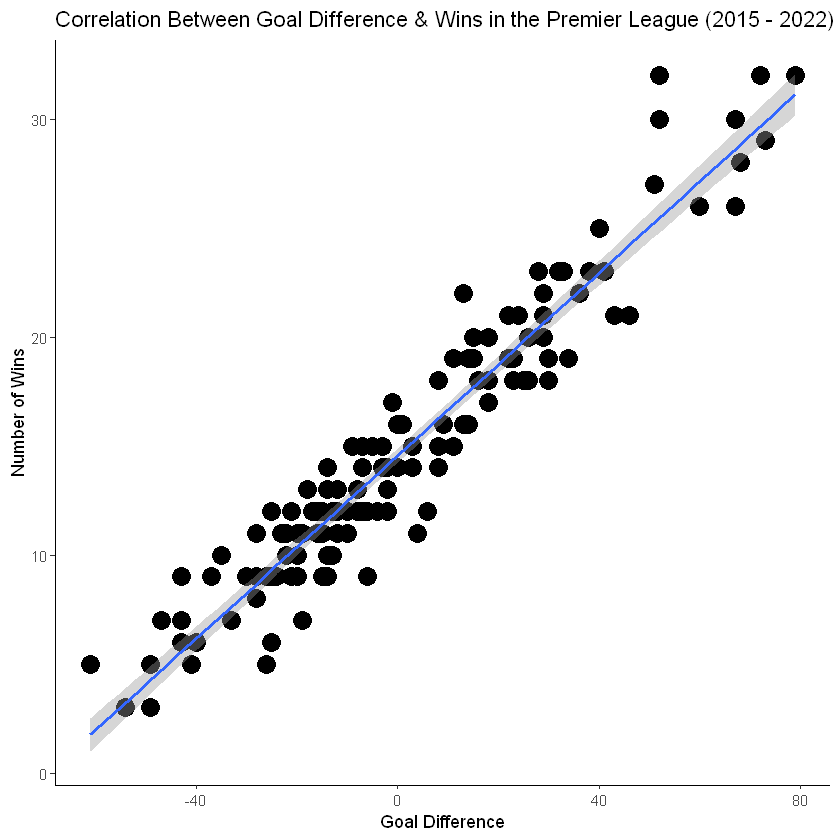

In [27]:
print(plot_3)

In [28]:
ggsave("goals_wins_premier.png", plot = plot_3)

Saving 6.67 x 6.67 in image


In [29]:
cor(wins_and_wages$GD, wins_and_wages$W)

[1] 0.9526041

END OF NOTEBOOK

written by jjm148 for DATA422